# Leasson 4, Activity 1: Working with adult income dataset (UCI)

In this activity, you will work with **Adult Income Dataset** from UCI Machine Learning portal. The Adult Income data set has been used in many machine learning papers that address classification problems. You will read the data from a CSV file into a Pandas DataFrame and do practice some of the advanced data wrangling you learned in this Lesson.

### URL for downloading the data
We have the data downloaded as a CSV file on the disk for your ease. However, it is recommended to practice data download on your own so that you are familiar with the process.

**Here is the URL for the data set**: https://archive.ics.uci.edu/ml/machine-learning-databases/adult/

**Here is the URL for the description of the data set and the variables (at the end of the document)**: https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names

### Attributes/Variables

Following are the details of the type of the attributes of this dataset for your reference. You may have to refer them while answering question on this activity. Note that, many of the attributes are of discrete factor type. These are common type for a classification problem unlike continuous numeric values used for regression problems.

* __age__: continuous.
* __workclass__: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* __fnlwgt__: continuous.
* __education__: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* __education-num__: continuous.
* __marital-status__: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* __occupation__: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* __relationship__: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* __race__: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* __sex__: Female, Male.
* __capital-gain__: continuous.
* __capital-loss__: continuous.
* __hours-per-week__: continuous.
* __native-country__: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

### A special note on the variable 'fnlwgt':

The weights on the CPS files are controlled to independent estimates of the civilian noninstitutional population of the US.  These are prepared monthly for us by Population Division here at the Census Bureau.  We use 3 sets of controls. These are:
1.  A single cell estimate of the population 16+ for each state.
2.  Controls for Hispanic Origin by age and sex.
3.  Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. 

People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement.  That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

### Cargar las bibliotecas necesarias

In [3]:
# Escribir el código aquí
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

### Lea el conjunto de datos de ingresos de adultos (en formato .csv) del directorio local y compruebe los 5 primeros registros.

In [4]:
# Escribir el código aquí
df = pd.read_csv('adult_income_data.csv')
df.head(5)

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


### ¿Crees que los nombres de las columnas (cabeceras) tienen sentido?

In [8]:
# Escribir el código aquí

In [15]:
df.columns=['Age', 'State Gov', 'ID', 'Study Degree', 'Num', 'Civil State', 'Profession', 'Family', 'Skyn Color', 'Gender', 'Num2', 'Num3', 'Num4', 'Country', 'Money']
df.head()

,Age,State Gov,ID,Study Degree,Num,Civil State,Profession,Family,Skyn Color,Gender,Num2,Num3,Num4,Country,Money
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [32]:
# Escribe el código aquí
df.rename(columns={'39':'Age', 'State-gov':'State Gov', '77516':'ID', 'Bachelors':'Study Degree', '13':'Num', 
                   'Never-married':'Civil State', 'Adm-clerical':'Profession', 'Not-in-family':'Family',
                   'White':'Skin Color', 'Male':'Gender', '2174':'Num2', '0':'Num3', '40':'Num4', 'United-States':'Country'
                   '<=50K':'Money'}, inplace=True)

### Añada un nombre ("Ingresos") para la variable de respuesta (última columna) al conjunto de datos y léalo de nuevo con los nombres de columna suministrados

In [16]:
# Escribe el código aquí
df.rename(columns={'Money':'Income'}, inplace=True)

In [17]:
## Escribe el código aquí
df.columns

Index(['Age', 'State Gov', 'ID', 'Study Degree', 'Num', 'Civil State',
       'Profession', 'Family', 'Skyn Color', 'Gender', 'Num2', 'Num3', 'Num4',
       'Country', 'Income'],
      dtype='object')

### Muestre un resumen estadístico del conjunto de datos. Te has dado cuenta de que solo se incluye un pequeño número de columnas?

In [18]:
## Escribe el código aquí
df.describe()
# Si me di cuenta

,Age,ID,Num,Num2,Num3,Num4
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### Muchas variables del conjunto de datos tienen múltiples factores o clases. ¿Puedes escribir un bucle para contarlas e imprimirlas?

In [34]:
column_counts = df['State Gov'].value_counts()
print("Value counts for Column State Gov:")
print(column_counts)

column_counts = df['Study Degree'].value_counts()
print("Value counts for Column Study Degree:")
print(column_counts)

column_counts = df['Civil State'].value_counts()
print("Value counts for Column Civil State:")
print(column_counts)

column_counts = df['Gender'].value_counts()
print("Value counts for Column Gender:")
print(column_counts)

Value counts for Column State Gov:
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: State Gov, dtype: int64
Value counts for Column Study Degree:
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Study Degree, dtype: int64
Value counts for Column Civil State:
 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse      

# Escribe tu código aquí

In [35]:
### ¿Faltan datos (NULL) en el conjunto de datos? Escriba una sola línea de código para mostrarlo en todos los campos
df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of          Age  State Gov     ID  Study Degree    Num  Civil State  Profession  \
0      False      False  False         False  False        False       False   
1      False      False  False         False  False        False       False   
2      False      False  False         False  False        False       False   
3      False      False  False         False  False        False       False   
4      False      False  False         False  False        False       False   
...      ...        ...    ...           ...    ...          ...         ...   
32555  False      False  False         False  False        False       False   
32556  False      False  False         False  False        False       False   
32557  False      False  False         False  False        False       False   
32558  False      False  False         False  False        False       False   
32559  False      False  False         False  False       

In [8]:
# Escribe el código quí

In [ ]:
### Practique subconjuntos: Crear un DataFrame con sólo
* age, 
* education,
* occupation
* race

In [36]:
# Escribe el código aquí
dfA = df.loc[[i for i in range(0, 100)], ['Age']]
print(dfA)
dfB = df.loc[[i for i in range(0, 100)], ['Study Degree']]
print(dfB)
dfC = df.loc[[i for i in range(0, 100)], ['Profession']]
print(dfC)
dfD = df.loc[[i for i in range(0, 100)], ['Skyn Color']]
print(dfD)

    Age
0    50
1    38
2    53
3    28
4    37
..  ...
95   48
96   37
97   48
98   32
99   76

[100 rows x 1 columns]
     Study Degree
0       Bachelors
1         HS-grad
2            11th
3       Bachelors
4         Masters
..            ...
95      Doctorate
96   Some-college
97     Assoc-acdm
98        HS-grad
99        Masters

[100 rows x 1 columns]
            Profession
0      Exec-managerial
1    Handlers-cleaners
2    Handlers-cleaners
3       Prof-specialty
4      Exec-managerial
..                 ...
95      Prof-specialty
96               Sales
97     Exec-managerial
98       Other-service
99     Exec-managerial

[100 rows x 1 columns]
   Skyn Color
0       White
1       White
2       Black
3       Black
4       White
..        ...
95      White
96      White
97      White
98      Black
99      White

[100 rows x 1 columns]


In [ ]:
### Muestra el histograma de la edad con un tamaño de celda = 20

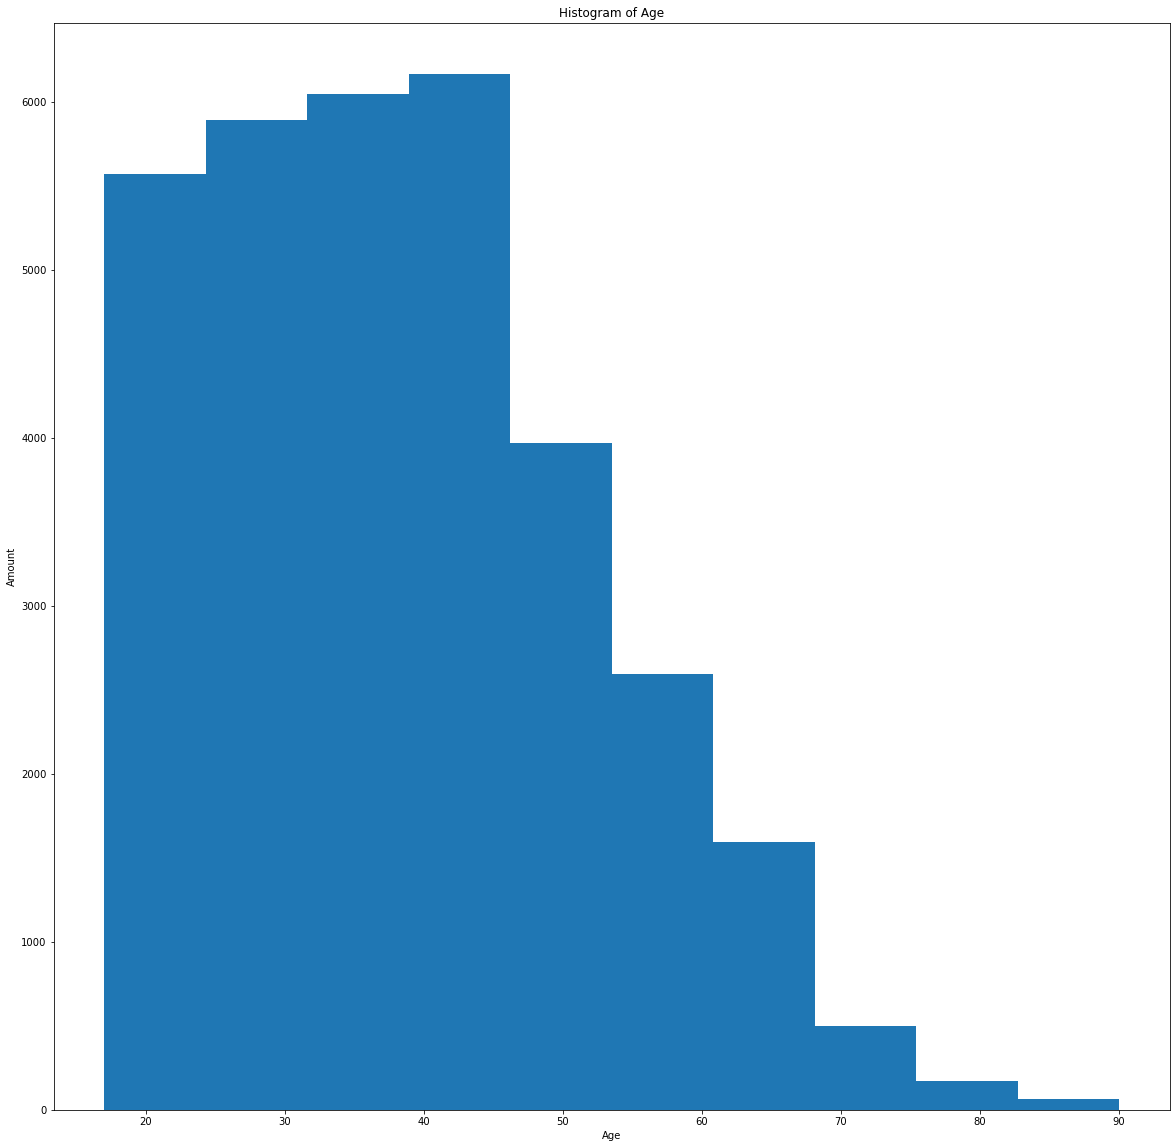

In [39]:
# Escribe el código aquí
df['Age'].plot(kind='hist', figsize=(20, 20))

plt.title('Histogram of Age')
plt.ylabel("Amount")
plt.xlabel("Age")
plt.show()

### Mostrar gráficos de caja de edad agrupados por raza (Utilice una figura larga de tamaño 15x6 y haga x ticks tamaño de fuente 15 )

In [11]:
# Escribe el código aquí.


### Escribamos una pequeña función para eliminar el carácter de espacio en blanco

In [41]:
# Escribe el código aquí.
df["Age"].replace(" ", np.nan, inplace=True)
df.head()

,Age,State Gov,ID,Study Degree,Num,Civil State,Profession,Family,Skyn Color,Gender,Num2,Num3,Num4,Country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


### Responda a la siguiente pregunta utilizando filtrado condicional/indización booleana:

"¿Cuántas personas negras de entre 30 y 50 años (inclusive) están representadas en este conjunto de datos?"

In [ ]:
# Escriba un código con cláusulas condicionales y únalas mediante & (AND) para filtrar el marco de datos
# Escribe el código aquí.

In [16]:
# Podemos observar la forma de la trama de datos filtrada y tomar el 1er elemento en el índice 0 de la tupla
# Escribe tu código aquí.

In [17]:
# Imprime el número de personas de color entre 30 y 50
# Escribe tu código aquí.

### Práctica Fusión por claves comunes: Supón que te dan dos conjuntos de datos cuya clave común es la ocupación. ¿Puede fusionarlos?
### En primer lugar, cree dos conjuntos de datos disjuntos tomando muestras aleatorias del conjunto de datos completo y, a continuación, intente fusionarlos. Incluya al menos otras 2 columnas junto con la columna de clave común para cada conjunto de datos.
### Observe cómo el conjunto de datos resultante, tras la fusión, puede tener más puntos de datos que cualquiera de los dos conjuntos de datos iniciales si su clave común no es única. ¿Por qué?

In [43]:
# Muestra del primer marco de datos con 5 elementos y el estado_aleatorio elegido
# Escribe tu código aquí
df_1 = df[['Age', 'State Gov', 'Civil State', 'Gender']].sample(n=5)
df_1

,Age,State Gov,Civil State,Gender
25485,22,Private,Never-married,Male
22570,53,Local-gov,Married-civ-spouse,Male
30105,56,Private,Married-civ-spouse,Male
14058,20,Private,Never-married,Male
1028,48,Self-emp-inc,Married-spouse-absent,Male


In [44]:
# Segundo marco de datos de muestra con 5 elementos y el estado_aleatorio elegido
# Escribe tu código aquí.
df_2 = df[['Age', 'State Gov', 'Civil State', 'Gender']].sample(n=5)
df_2

,Age,State Gov,Civil State,Gender
5312,25,Self-emp-not-inc,Never-married,Female
6455,33,Private,Never-married,Male
12585,30,Local-gov,Divorced,Female
10454,65,Private,Married-civ-spouse,Male
15782,43,Federal-gov,Separated,Female


In [24]:
# Fusionar los marcos de datos
# Escribe el código aquí.

In [25]:
# Mostrar el marco de datos fusionado
# Escribir el código aquí.